RNN (순환 신경망)

- 순서가 있는 데이터를 입력으로 받음
- 변화하는 입력에 대한 출력을 얻음
- 시계열(날씨, 추가 등), 자연어와 같이 시간의 흐름에 따라 변화하고, 그 변화가 의미를 갖는 데이터

Feed Foward Network (앞먹임 구조)

- 일반적인 구조의 신경망
- 입력 > 은닉 > 출력층으로 이어지는 단방향 구조
- 이전 스텝의 출력의 영향을 받지 않음

Recurrent Net (되먹임 구조)

- 이전 층 (Layer), 또는 스텝의 출력이 다시 입력으로 연결되는 신경망 구조
- 각 스텝마다 이전 상태를 기억 시스템 (Memory System)
- 현재 상태가 이전 상태에 종속

### RNN

#### 입력 : timesteps, input_features
#### 출력 : timesteps, output_features

In [1]:
import numpy as np

In [5]:
timesteps = 100
input_features = 32
output_features = 64

inputs = np.random.random((timesteps, input_features))

state_t = np.zeros((output_features, ))

W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))

succesive_outputs = []

for input_t in inputs:
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    succesive_outputs.append(output_t)
    state_t = output_t
    
final_output_sequence = np.stack(succesive_outputs, axis = 0) ## stack = concatenate

### Keras RNN

#### SimpleRNN layer
#### 입력 : (batch_size, timesteps, input_features)
#### 출력 : return_sequences로 결정할 수 있음 
####          3D Tensor - 타임스텝의 출력을 모은 전체 시퀀스를 반환 (batch_size, timesteps, output_features)
####          2D Tensor - 입력 시퀀스에 대한 마지막 출력만 반환 (batch_size, output_features)

In [6]:
from tensorflow.keras.layers import SimpleRNN, Embedding
from tensorflow.keras.models import Sequential

In [7]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


2022-01-19 14:08:10.011113: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [10]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences = True))
model.add(SimpleRNN(32, return_sequences = True))
model.add(SimpleRNN(32, return_sequences = True))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 32)                2080      
                                                                 
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


## Read Data

In [11]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

In [15]:
num_words = 10000
max_len = 500
batch_size = 32

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=num_words)
print(len(input_train))
print(len(input_test))

## padding (길이를 맞춰주는것)

input_train = sequence.pad_sequences(input_train, maxlen = max_len)
input_test = sequence.pad_sequences(input_test, maxlen = max_len)
print(input_train.shape)
print(input_test.shape)

25000
25000
(25000, 500)
(25000, 500)


## Modeling

In [16]:
from tensorflow.keras.layers import Dense

In [22]:
model = Sequential()

model.add(Embedding(num_words, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['acc'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_11 (SimpleRNN)   (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


#### Model training

In [23]:
history = model.fit(input_train, y_train,
                   epochs=10,
                   batch_size=128,
                   validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 14s 87ms/step - loss: 0.6577 - acc: 0.5897 - val_loss: 0.5138 - val_acc: 0.7560
Epoch 2/10
157/157 [==============================] - 13s 85ms/step - loss: 0.4181 - acc: 0.8178 - val_loss: 0.3910 - val_acc: 0.8324
Epoch 3/10
157/157 [==============================] - 13s 84ms/step - loss: 0.3071 - acc: 0.8773 - val_loss: 0.5732 - val_acc: 0.7750
Epoch 4/10
157/157 [==============================] - 13s 85ms/step - loss: 0.2477 - acc: 0.9047 - val_loss: 0.3803 - val_acc: 0.8554
Epoch 5/10
157/157 [==============================] - 13s 85ms/step - loss: 0.1896 - acc: 0.9299 - val_loss: 0.3632 - val_acc: 0.8622
Epoch 6/10
157/157 [==============================] - 13s 86ms/step - loss: 0.1612 - acc: 0.9431 - val_loss: 0.4867 - val_acc: 0.8288
Epoch 7/10
157/157 [==============================] - 14s 89ms/step - loss: 0.0931 - acc: 0.9701 - val_loss: 0.4779 - val_acc: 0.8286
Epoch 8/10
157/157 [==============================] - 14s 88ms

## EDA

In [26]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

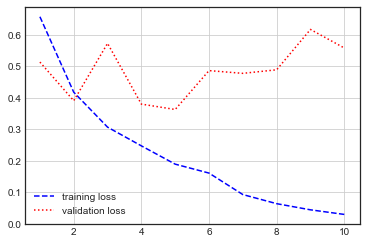

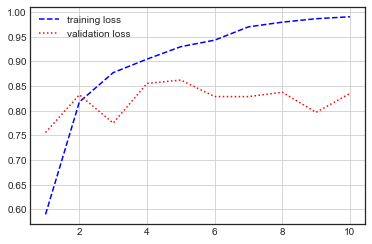

In [28]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss) +1)

plt.plot(epochs, loss, 'b--', label = 'training loss')
plt.plot(epochs, val_loss, 'r:', label = 'validation loss')
plt.grid()
plt.legend()

plt.figure()
plt.plot(epochs, acc, 'b--', label = 'training loss')
plt.plot(epochs, val_acc, 'r:', label = 'validation loss')
plt.grid()
plt.legend()

plt.show()

In [29]:
model.evaluate(input_test, y_test)

782/782 [==============================] - 11s 14ms/step - loss: 0.5821 - acc: 0.8291


[0.5821483135223389, 0.8290799856185913]

## LSTM (Long Short - Term Memory)
### 장단기 메모리 알고리즘
### 나중을 위해 정보를 저장함으로써 오래된 시그널이 점차 소실되는 것을 막아줌

In [30]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [37]:
num_words = 10000
max_len = 500

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = num_words)
print(len(input_train))
print(len(input_test))

pad_x_train = sequence.pad_sequences(x_train, maxlen = max_len)
pad_x_test = sequence.pad_sequences(x_test, maxlen = max_len)
print(pad_x_train.shape)
print(pad_x_test.shape)

25000
25000
(25000, 500)
(25000, 500)


### Modeling

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, Embedding

In [34]:
model = Sequential()

model.add(Embedding(num_words, 32))
model.add(LSTM(32))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer='rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['acc'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, None, 32)          320000    
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [38]:
history = model.fit(pad_x_train, y_train,
                   epochs=10,
                   batch_size=128,
                   validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 24s 145ms/step - loss: 0.5008 - acc: 0.7591 - val_loss: 0.5971 - val_acc: 0.7638
Epoch 2/10
157/157 [==============================] - 23s 146ms/step - loss: 0.2910 - acc: 0.8868 - val_loss: 0.8254 - val_acc: 0.7344
Epoch 3/10
157/157 [==============================] - 23s 148ms/step - loss: 0.2367 - acc: 0.9094 - val_loss: 0.2902 - val_acc: 0.8912
Epoch 4/10
157/157 [==============================] - 23s 146ms/step - loss: 0.1992 - acc: 0.9263 - val_loss: 0.3084 - val_acc: 0.8630
Epoch 5/10
157/157 [==============================] - 23s 145ms/step - loss: 0.1818 - acc: 0.9344 - val_loss: 0.3646 - val_acc: 0.8444
Epoch 6/10
157/157 [==============================] - 23s 150ms/step - loss: 0.1594 - acc: 0.9423 - val_loss: 0.3062 - val_acc: 0.8804
Epoch 7/10
157/157 [==============================] - 23s 148ms/step - loss: 0.1509 - acc: 0.9472 - val_loss: 0.3152 - val_acc: 0.8858
Epoch 8/10
157/157 [==============================] - 2

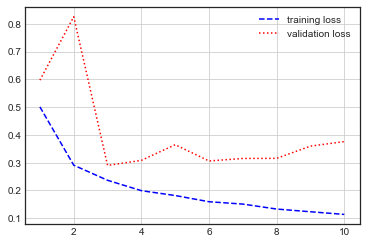

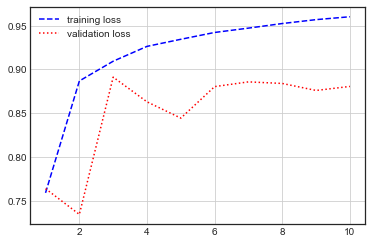

In [39]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss) +1)

plt.plot(epochs, loss, 'b--', label = 'training loss')
plt.plot(epochs, val_loss, 'r:', label = 'validation loss')
plt.grid()
plt.legend()

plt.figure()
plt.plot(epochs, acc, 'b--', label = 'training loss')
plt.plot(epochs, val_acc, 'r:', label = 'validation loss')
plt.grid()
plt.legend()

plt.show()

### Model Evaluate

In [40]:
model.evaluate(pad_x_test, y_test)

782/782 [==============================] - 16s 21ms/step - loss: 0.4185 - acc: 0.8605


[0.41853103041648865, 0.860480010509491]

## GRU (Gated Recurrent Unit)

### LSTM을 더 단순하게 만든 구조
### 기억 셀은 없고, 시간방향으로 전파하는 것은 은닉 상태만 있음

### reset gate

#### - 과거의 은닉 상태를 얼마나 무시할지를 결정
#### - R 값이 결정

### update gate

#### - 은닉 상태를 갱신하는 게이트
#### - LSTM의 forget, input gate 역할을 동시에 함

## Read Data

In [41]:
from tensorflow.keras.datasets import reuters

In [42]:
num_words = 10000
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words = num_words)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

2121728/2110848 [==============================] - 0s 0us/step
(8982,)
(8982,)
(2246,)
(2246,)


In [43]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [44]:
max_len = 300

In [46]:
pad_x_train = pad_sequences(x_train, maxlen = max_len)
pad_x_test = pad_sequences(x_test, maxlen = max_len)

print(len(pad_x_train[0]))

300


In [47]:
pad_x_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

## Modeling

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Embedding

In [50]:
model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=256))
model.add(GRU(256, return_sequences=True))
model.add(GRU(128))
model.add(Dense(46, activation = 'softmax'))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['acc'])

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, None, 256)         2560000   
                                                                 
 gru (GRU)                   (None, None, 256)         394752    
                                                                 
 gru_1 (GRU)                 (None, 128)               148224    
                                                                 
 dense_8 (Dense)             (None, 46)                5934      
                                                                 
Total params: 3,108,910
Trainable params: 3,108,910
Non-trainable params: 0
_________________________________________________________________


In [51]:
history = model.fit(pad_x_train, y_train,
                   batch_size=32, epochs=20,
                   validation_split=0.2)

Epoch 1/20
225/225 [==============================] - 84s 362ms/step - loss: 2.0431 - acc: 0.4643 - val_loss: 1.8329 - val_acc: 0.5348
Epoch 2/20
225/225 [==============================] - 77s 342ms/step - loss: 1.5577 - acc: 0.6011 - val_loss: 1.5457 - val_acc: 0.6183
Epoch 3/20
225/225 [==============================] - 77s 343ms/step - loss: 1.3425 - acc: 0.6555 - val_loss: 1.4159 - val_acc: 0.6466
Epoch 4/20
225/225 [==============================] - 1653s 7s/step - loss: 1.0005 - acc: 0.7429 - val_loss: 1.3567 - val_acc: 0.6706
Epoch 5/20
225/225 [==============================] - 77s 341ms/step - loss: 0.7456 - acc: 0.8058 - val_loss: 1.3566 - val_acc: 0.6828
Epoch 6/20
225/225 [==============================] - 868s 4s/step - loss: 0.5530 - acc: 0.8592 - val_loss: 1.3783 - val_acc: 0.6867
Epoch 7/20
225/225 [==============================] - 80s 357ms/step - loss: 0.4123 - acc: 0.8976 - val_loss: 1.4339 - val_acc: 0.7023
Epoch 8/20
225/225 [==============================] - 1931